In [1]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from src.rocket import Rocket
from src.pos_rocket_vis import *
from nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [3]:
sim_time = 15 # simulation length in seconds

x0 = np.array([
    0, 0, 0,
    0, 0, np.deg2rad(30),  # gamma = 30 deg
    0, 0, 0,
    3., 2., 10.  # x = 3m, y = 2m, z = 10m
])

x_ref = np.array([
    0, 0, 0,
    0, 0, 0,
    0, 0, 0,
    1., 0., 3.  # x = 1m, y = 0m, z = 3m
])

xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

H = 5.0 # horizon time 
nmpc = NmpcCtrl(rocket, H, xs, us)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [4]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)

Simulating time 0.00
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   2.00ms (  8.55us)   3.44ms ( 14.69us)       234
       nlp_g  | 105.00ms (448.72us) 103.71ms (443.21us)       234
  nlp_grad_f  |   6.00ms ( 27.27us)   4.64ms ( 21.10us)       220
  nlp_hess_l  |   1.36 s (  6.32ms)   1.37 s (  6.37ms)       215
   nlp_jac_g  | 416.00ms (  1.87ms) 425.94ms (  1.91ms)       223
       total  |   3.99 s (  3.99 s)   3.99 s (  3.99 s)         1
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   2.00ms ( 58.82us) 490.00us ( 14.41us)        34
       nlp_g  |  13.00ms (382.35us)  15.33ms (450.85us)        34
  nlp_grad_f  |   1.00ms ( 28.57us) 721.00us ( 20.60us)        35
  nlp_hess_l  | 207.00ms (  6.27ms) 208.42ms (  6.32ms)        33
   nlp_jac_g  |  68.00ms (  1.94ms)  64.79ms (  1.85ms)        35
       total  | 591.00ms (591.00ms) 590.51ms (590.51ms)         1
      solver  :   t_proc      (avg)   t_wall      (avg)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

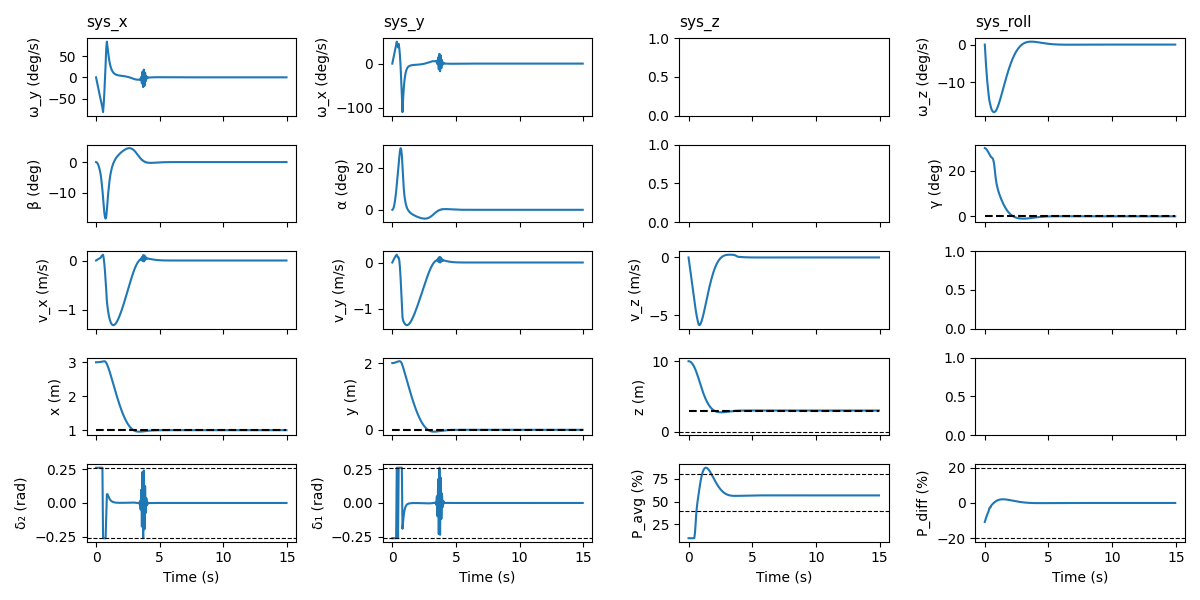

In [5]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)